<a href="https://www.kaggle.com/code/yassinenajem/amazon-prime-recommendation-system?scriptVersionId=96866746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### importing Data

In [2]:
df = pd.read_csv("../input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


### --> Checking for missing values

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'missing values in each column')

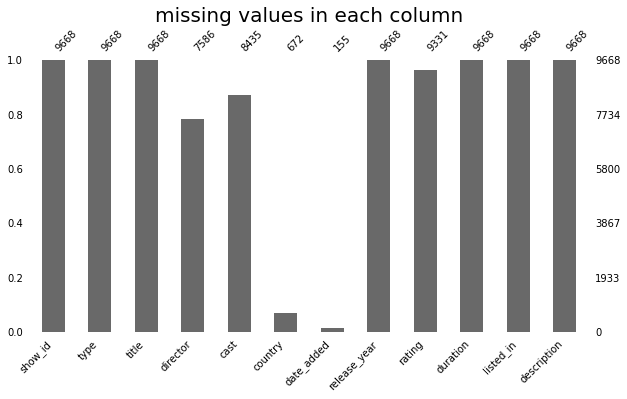

In [5]:
import missingno 
missingno.bar(df,fontsize=10,figsize=(10,5))
plt.title('missing values in each column',fontsize=20)

- There are missing values in column director,cast,country and date_added.
- We can't randomly fill the missing values in columns of director and cast, so we can drop them.
- For minimal number of missing values in country and date_added,rating

### Handling missing values

In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [7]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [10]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

0         Comedy
1          Drama
2         Action
3    Documentary
4          Drama
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_add, dtype: object

In [12]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

0    March
1    March
2    March
3    March
4    March
Name: month_add, dtype: object

In [13]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

0            Canada
1             India
2     United States
3     United States
4    United Kingdom
Name: country_main, dtype: object

In [14]:
df['type'].value_counts()

Movie    6952
Name: type, dtype: int64

In [15]:
df['rating'].value_counts()

13+              1737
16+              1220
18+              1068
R                 990
ALL               547
PG-13             382
United States     306
PG                243
7+                237
NR                106
G                  72
UNRATED            33
AGES_18_            3
NOT_RATE            3
NC-17               2
AGES_16_            2
16                  1
Name: rating, dtype: int64

In [16]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [17]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,United States,113 min,Comedy,A small fishing village must procure a local d...,2021,March,Canada
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...,2021,March,India
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,United States,74 min,Action,After a man discovers his wife is cheating on ...,2021,March,United States
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,United States,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021,March,United States
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,United States,45 min,Drama,Teenage Matt Banting wants to work with a famo...,2021,March,United Kingdom


## 3. Exploratory Data Analysis

### Number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

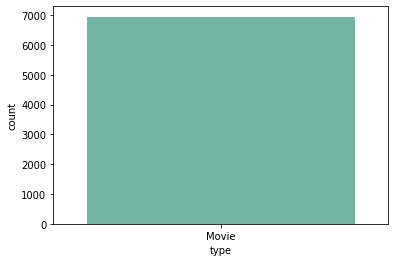

In [18]:
sb.countplot(x="type", data= df, palette="Set2")

<AxesSubplot:xlabel='rating', ylabel='count'>

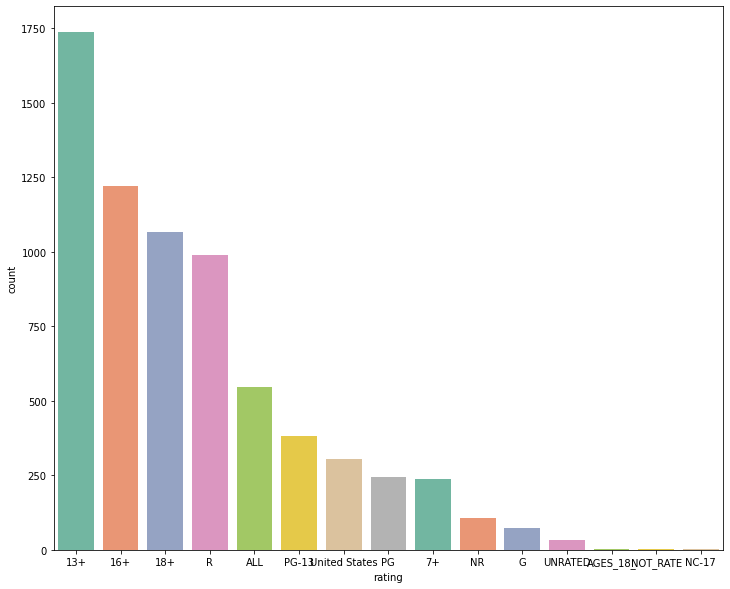

In [19]:
#number of movies & show 
plt.figure(figsize=(12,10))
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

### Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='release_year'>

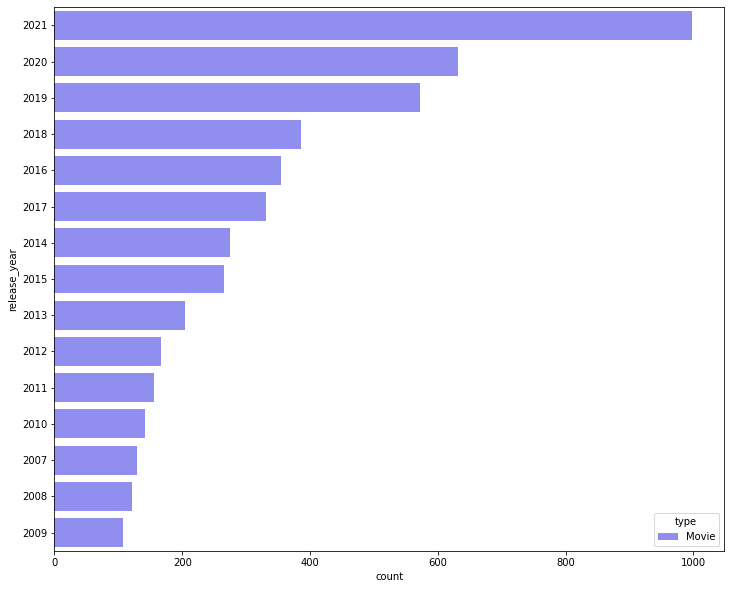

In [20]:
plt.figure(figsize=(12,10))
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

### Analysis of movies duration

In [21]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

0       113
1       110
2        74
3        69
4        45
       ... 
9660     96
9662     93
9663     60
9665     90
9667    103
Name: duration, Length: 6952, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

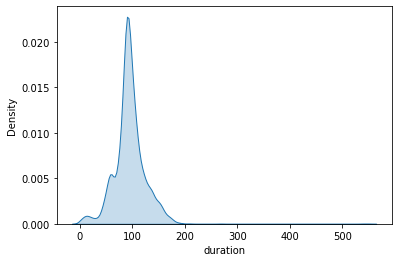

In [22]:
sb.kdeplot(data=movie_df['duration'], shade=True)

### Countries on top for movies content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

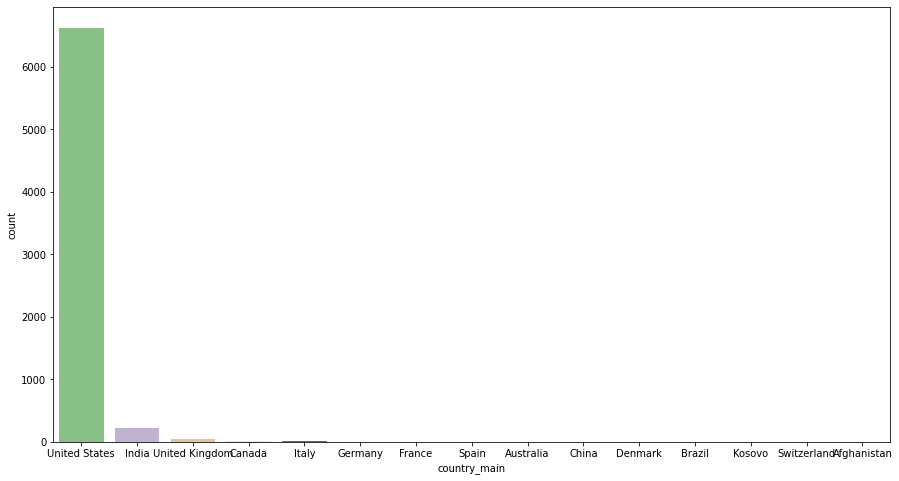

In [23]:
plt.figure(figsize=(15,8))
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

In [24]:
columns=['Genre','country_main']
gen_country = df[columns]

In [25]:
gen_country.head()

,Genre,country_main
0,Comedy,Canada
1,Drama,India
2,Action,United States
3,Documentary,United States
4,Drama,United Kingdom


In [26]:
gen_country['Genre'].value_counts()

Drama                        1879
Action                       1467
Comedy                       1220
Horror                        491
Documentary                   447
Arts                          410
Suspense                      179
Animation                     127
Arthouse                      120
Romance                       118
Kids                          103
Western                        96
Science Fiction                58
Adventure                      58
Special Interest               52
International                  36
Fitness                        16
Fantasy                        16
Anime                          14
Music Videos and Concerts      13
LGBTQ                          10
Faith and Spirituality          9
Sports                          5
Military and War                3
Historical                      3
Young Adult Audience            2
Name: Genre, dtype: int64

In [27]:
size = gen_country['Genre'].value_counts()
size

Drama                        1879
Action                       1467
Comedy                       1220
Horror                        491
Documentary                   447
Arts                          410
Suspense                      179
Animation                     127
Arthouse                      120
Romance                       118
Kids                          103
Western                        96
Science Fiction                58
Adventure                      58
Special Interest               52
International                  36
Fitness                        16
Fantasy                        16
Anime                          14
Music Videos and Concerts      13
LGBTQ                          10
Faith and Spirituality          9
Sports                          5
Military and War                3
Historical                      3
Young Adult Audience            2
Name: Genre, dtype: int64

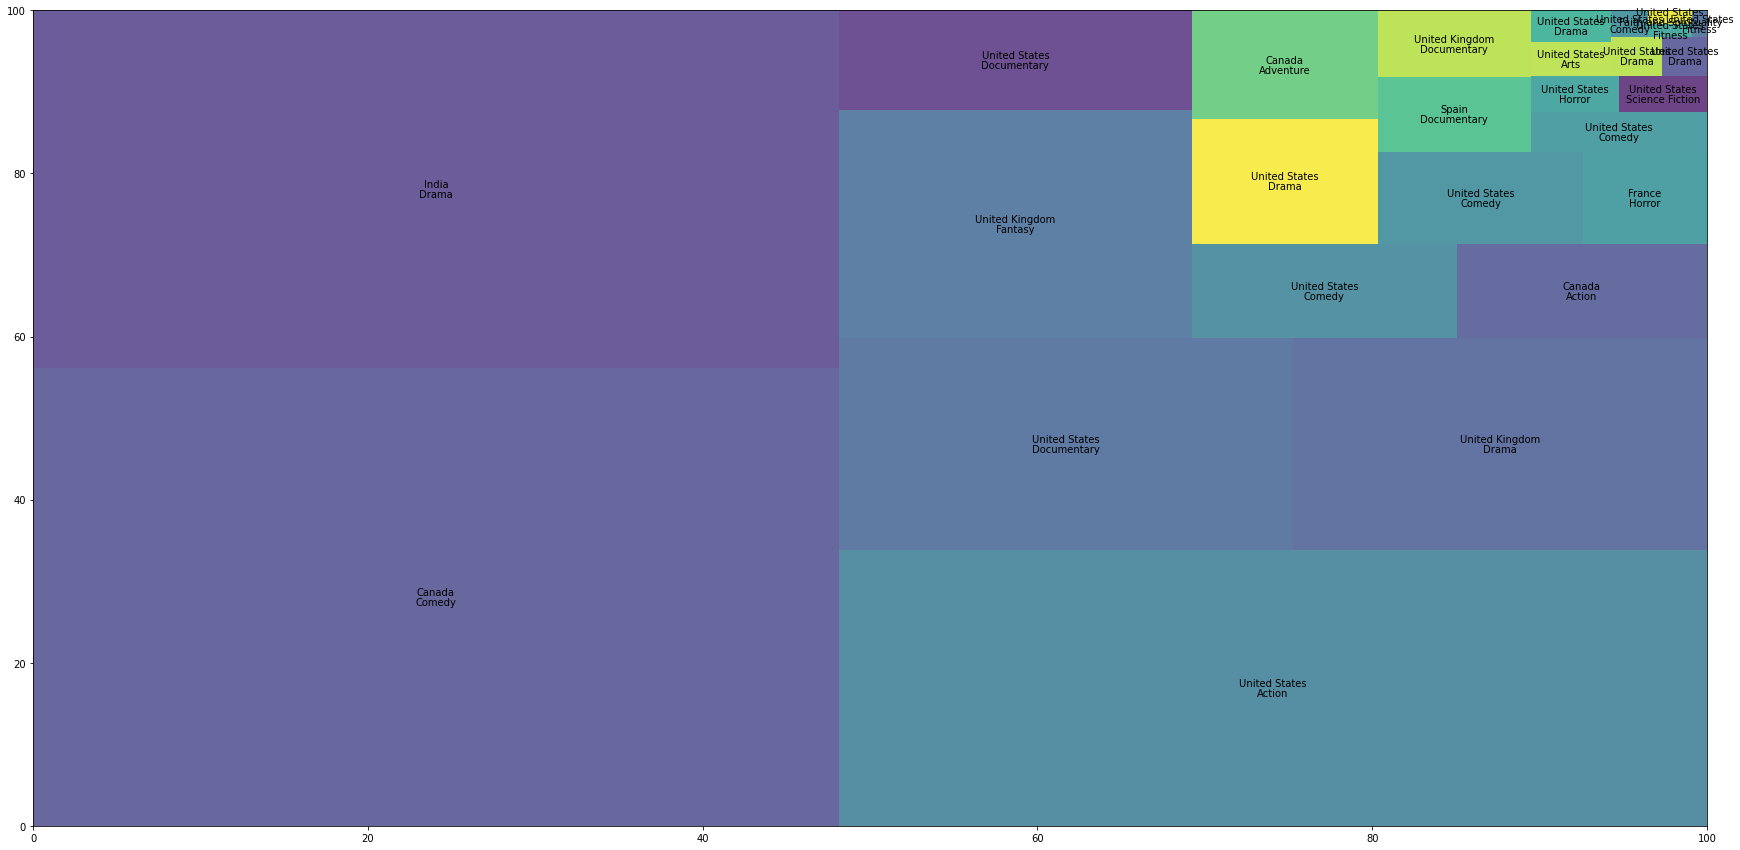

In [28]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

## Amazon prime Recommendation System

## Multiple metrics(Genre,cast,description)  based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [29]:
features=['Genre','cast','description','title']
filters = df[features]

In [30]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [31]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,cast,description,title
0,comedy,"brendangleeson,taylorkitsch,gordonpinsent",asmallfishingvillagemustprocurealocaldoctortos...,thegrandseduction
1,drama,"maheshmanjrekar,abhaymahajan,sachinkhedekar",ametrofamilydecidestofightacybercriminalthreat...,takecaregoodnight
2,action,"tomsizemore,lorenzolamas,robertlasardo,richard...",afteramandiscovershiswifeischeatingonhimwithan...,secretsofdeception
3,documentary,"interviewswith:pink,adele,beyoncé,britneyspear...","pinkbreaksthemoldonceagain,bringinghercareerto...",pink:stayingtrue
4,drama,"harrydeanstanton,kierano'brien,georgecostigan,...",teenagemattbantingwantstoworkwithafamousbutecc...,monstermaker


We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [32]:
def create_soup(x):
    return x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [33]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
filters.sort_values(by='Genre' ,ascending=False).head(60)

,Genre,cast,description,title,soup
3855,youngadultaudience,"nickjonas,joejonas,kevinjonas,priyankachoprajo...",aliveconcertexperienceandexclusivelookintolife...,happinesscontinues:ajonasbrothersconcertfilm,"nickjonas,joejonas,kevinjonas,priyankachoprajo..."
1058,youngadultaudience,"loviesimone,jharreljerome,celesteo’connor,jess...",fivefactionsruntheundergroundlifeoftheprestigi...,selahandthespades,"loviesimone,jharreljerome,celesteo’connor,jess..."
864,western,"bobsteele,marieburton,edcassidy,charlesking,mi...",sundownsaunders(steele)winsaranchonaprimepiece...,sundownsaunders,"bobsteele,marieburton,edcassidy,charlesking,mi..."
3106,western,"royrogers,daleevans,grantwithers,wildbillellio...","daleevansinheritsacircus,butherdeadfather'spar...",bellsofrosarita,"royrogers,daleevans,grantwithers,wildbillellio..."
2418,western,"bustercrabbe,alst.john,francesgladwin,marinsai...","whileoutlookingforrustlers,agunfightensuesandb...",frontieroutlaws,"bustercrabbe,alst.john,francesgladwin,marinsai..."
1436,western,"georgec.scott,fayedunaway,johnmills,jackpalanc...","in1913,inoklahoma,oilderrickownerlenadoyle(fay...",oklahomacrude,"georgec.scott,fayedunaway,johnmills,jackpalanc..."
860,western,"royrogers,george'gabby'hayes,lynnecarver,frank...",roy'sstrongresemblancetoanotoriouscrookgiveshi...,sunsetonthedesert,"royrogers,george'gabby'hayes,lynnecarver,frank..."
8052,western,"geneautry,champion,annejames","in1878,geneautryisacattlebuyerwhotriestosettle...",barbedwire,"geneautry,champion,annejames western in1878,ge..."
8054,western,"geneautry,champion,carolinacotton",cavalryscoutsgeneautry&patbuttramareorderedtob...,apachecountry,"geneautry,champion,carolinacotton western cava..."
8590,western,"williams.hart,barbarabedford,lucienlittlefield",thegovernmentwillgrantafringeofterrainforthese...,tumbleweeds,"williams.hart,barbarabedford,lucienlittlefield..."


In [37]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [38]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

## testing the recommendation system

In [39]:
get_recommendations_new('theoutlaw', cosine_sim2)

4917                                             Eternity
2636                                            Dodsworth
3845        It's A Wonderful Life (Black & White Version)
4320                                It's A Wonderful Life
4489                                            High Noon
9085                               Terror in a Texas Town
508                                        The North Star
916          Stagecoach - The Original John Wayne Classic
4751                                    The Last Round-Up
5446    D.W. Griffith's "Abraham Lincoln" - The Walter...
Name: title, dtype: object

In [40]:
get_recommendations_new('drugwar', cosine_sim2)

7127    Act 4 - Title before 1C onboarding 2
7128    Act 4 - Title before 1C onboarding 1
8755                         ACT 2 - TITLE 9
8756                         ACT 2 - TITLE 8
8757                         ACT 2 - TITLE 7
9463                   Clip: Act 5 - Title 3
8939                                   Three
4371                             Overheard 3
4372                             Overheard 2
6930                 Title Post onboarding 8
Name: title, dtype: object

In [41]:
get_recommendations_new('you,meandhim', cosine_sim2)

1779              Mad to be Normal
3895               Cottage Country
4677                 Bad Samaritan
8220     A Good Old Fashioned Orgy
6989    The Lair of the White Worm
2290                  Greenfingers
8623             The Song of Lunch
6572                           G19
9509     Gaddappana Duniya (Hindi)
1590     Movie_Project_UN_Test_UHD
Name: title, dtype: object